## Import stuff

In [1]:
# !pip install lda
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from sklearn import preprocessing as prep
from sklearn.feature_extraction import DictVectorizer
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LassoLarsCV
from sklearn.linear_model import RidgeCV

import csv

from sklearn.metrics import r2_score
from sklearn.svm import SVR
from sklearn import tree

from sklearn.preprocessing import normalize
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import cross_validation
import warnings
import matplotlib.pyplot as plt

import lda

import pickle

%matplotlib inline

## import data

In [5]:
movie = pd.read_csv('main.csv')

In [6]:
col_names = movie.columns.tolist()
col_names = [col for col in col_names if col != 'gross']

In [7]:
predictors = movie[col_names]
print(predictors.shape)

(3598, 63)


In [8]:
target = movie.gross

In [9]:
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=.3, random_state=123)
pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, target, test_size=.3, random_state=123)

## use a linear model

In [10]:
m = LinearRegression()
n = LogisticRegression()
p = tree.DecisionTreeRegressor()
# svr_rbf = SVR(kernel='rbf', C=1, cache_size=20000, coef0=0.1, epsilon=0.3, gamma='auto',
#     max_iter=10000)
# svr_lin = SVR(kernel='linear', C=1, cache_size=20000, coef0=0.1, epsilon=0.3, gamma='auto',
#     max_iter=10000)
# svr_sig = SVR(kernel='sigmoid', C=1, cache_size=20000, coef0=0.1, epsilon=0.3, gamma='auto',
#     max_iter=10000)
	
# y_svr1 = svr_rbf.fit(X_train, y_train).predict(X_test)
# y_svr2 = svr_lin.fit(X_train, y_train).predict(X_test)
# y_svr3 = svr_sig.fit(X_train, y_train).predict(X_test)
y_linReg = m.fit(X_train, y_train).predict(X_test)
y_linLog = n.fit(X_train, y_train).predict(X_test)
y_tree = p.fit(X_train, y_train).predict(X_test)

# r2_score1 = r2_score(y_test, y_svr1)
# r2_score2 = r2_score(y_test, y_svr2)
# r2_score3 = r2_score(y_test, y_svr3)
r2_score4 = r2_score(y_test, y_linReg)
r2_score5 = r2_score(y_test, y_linLog)
r2_score6 = r2_score(y_test, y_tree)

# print('r2_score of svr rbf',r2_score1)
# print('r2_score of svr linear',r2_score2)
# print('r2_score of svr sigmoid',r2_score3)
print('r2_score of linear regression',r2_score4)
print('r2_score of logisticregression',r2_score5)
print('r2_score of decision tree',r2_score6)

r2_score of linear regression 0.526465206506
r2_score of logisticregression -0.494145038468
r2_score of decision tree 0.270851556363


In [11]:
def drawPlot(y1, y2, title):
	plt.scatter(y1, y2)
	plt.xlabel('predict_gross')
	plt.ylabel('real_gross')
	plt.title(title)
	plt.show()

Buckets = [2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 15, 20, 25, 30, 50, 80, 120, 160, 200, 300, 400]
def drawBuckets(y1, y2, title):
	minv = min(y1 + y2)
	maxv = max(y1 + y2)
	aur = []
	for bucket in Buckets:
		val = (maxv - minv) / bucket
		lenV = len(y1)
		count = 0
		for i in range(1, lenV):
			if(abs(y1[i] - y2[i]) <= val):
				count = count + 1
		aur.append(count / lenV)
	plt.plot(Buckets, aur, 'b-o')
	plt.xlabel('number of Bueckets')
	plt.ylabel('precsion')
	plt.xscale('log')
	plt.title(title)
	plt.show()

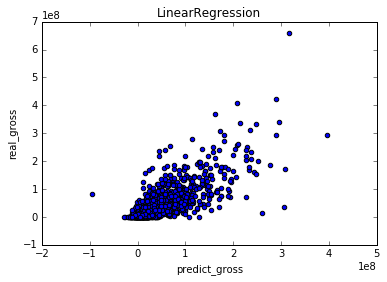

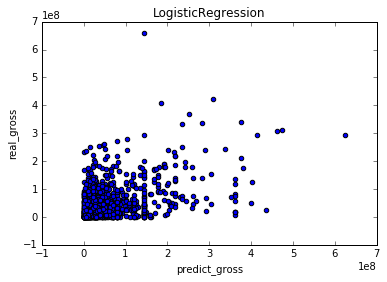

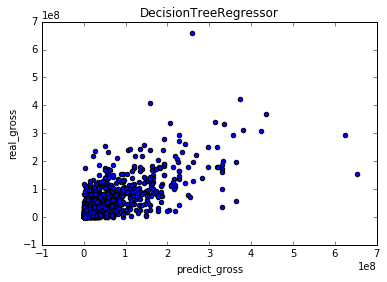

KeyError: 1

In [12]:
# plt.figure(1)
# drawPlot(y_svr1, y_test, 'svr rbf')
# plt.figure(2)
# drawPlot(y_svr2, y_test, 'svr linear')
# plt.figure(3)
# drawPlot(y_svr3, y_test, 'svr sigmoid')
plt.figure(4)
drawPlot(y_linReg, y_test, 'LinearRegression')
plt.figure(5)
drawPlot(y_linLog, y_test, 'LogisticRegression')
plt.figure(6)
drawPlot(y_tree, y_test, 'DecisionTreeRegressor')


# plt.figure(7)
# drawBuckets(y_linReg, y_test, 'svr rbf')
# plt.figure(8)
# drawBuckets(y_linLog, y_test, 'svr linear')
# plt.figure(9)
# drawBuckets(y_tree, y_test, 'svr sigmoid')
plt.figure(10)
drawBuckets(y_linReg, y_test, 'LinearRegression')
plt.figure(11)
drawBuckets(y_linLog, y_test, 'LogisticRegression')
plt.figure(12)
drawBuckets(y_tree, y_test, 'DecisionTreeRegressor')

In [13]:
linear_model = m.fit(X_train, y_train)
pickle.dump( linear_model, open( "linear_regression.pkl", "wb" ) )

## Lasso regression

In [14]:
model = LassoLarsCV(cv=10, precompute=False).fit(pred_train,tar_train)

In [15]:
coef_dict = dict(zip(predictors.columns, model.coef_))
[(k, coef_dict[k]) for k in sorted(coef_dict, key=coef_dict.get, reverse=True)]

[('cast_total_facebook_likes', 2094486094.2955351),
 ('num_voted_users', 148179568.14823848),
 ('budget', 126309800.36297567),
 ('num_user_for_reviews', 33339179.440246537),
 ('Family', 22631705.132964153),
 ('duration', 15790228.272239435),
 ('imdb_score', 13808706.8467911),
 ('Music', 10376375.332906429),
 ('topic20', 10339553.462899072),
 ('topic26', 10336465.868010174),
 ('Documentary', 10246024.109377168),
 ('num_critic_for_reviews', 9393809.0471010264),
 ('topic3', 8493476.1133800056),
 ('topic17', 7615920.2787977709),
 ('Comedy', 7484160.2949222513),
 ('topic10', 7300037.8968067449),
 ('topic0', 7007316.1457819594),
 ('Adventure', 6863609.6075055609),
 ('topic23', 5912844.5121847233),
 ('Romance', 5767425.5708317086),
 ('topic4', 5612623.7914361488),
 ('Animation', 5109243.3333791392),
 ('Horror', 3959421.3476931611),
 ('topic18', 2990675.8736988069),
 ('Sport', 2702700.2969752592),
 ('topic16', 1923146.0081018051),
 ('topic19', 1767345.2489239979),
 ('topic22', 1742563.44986354

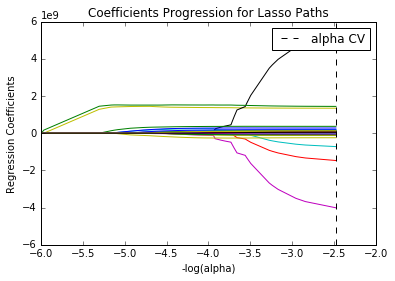

In [16]:
m_log_alphas = -np.log10(model.alphas_)
ax = plt.gca()
plt.plot(m_log_alphas, model.coef_path_.T)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha CV')
plt.legend()
plt.ylabel('Regression Coefficients')
plt.xlabel('-log(alpha)')
plt.title('Coefficients Progression for Lasso Paths')

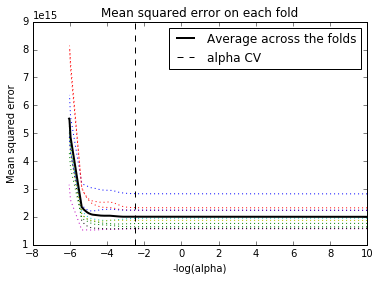

In [17]:
m_log_alphascv = -np.log10(model.cv_alphas_)
plt.figure()
plt.plot(m_log_alphascv, model.cv_mse_path_, ':')
plt.plot(m_log_alphascv, model.cv_mse_path_.mean(axis=-1), 'k',
         label='Average across the folds', linewidth=2)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha CV')
plt.legend()
plt.xlabel('-log(alpha)')
plt.ylabel('Mean squared error')
plt.title('Mean squared error on each fold')

In [18]:
# MSE from training and test data
from sklearn.metrics import mean_squared_error
train_error = mean_squared_error(tar_train, model.predict(pred_train))
test_error = mean_squared_error(tar_test, model.predict(pred_test))
print ('training data MSE')
print(train_error)
print ('test data MSE')
print(test_error)

training data MSE
1.86193426453e+15
test data MSE
1.87261233114e+15


In [19]:
# R-square from training and test data
rsquared_train=model.score(pred_train,tar_train)
rsquared_test=model.score(pred_test,tar_test)
print ('training data R-square')
print(rsquared_train)
print ('test data R-square')
print(rsquared_test)

training data R-square
0.662702521486
test data R-square
0.526537553705


### Output current model

In [20]:
pickle.dump( model, open( "lasso_regression.pkl", "wb" ) )